In [11]:
import os 
os.chdir('../functions')

!pip install seaborn_qqplot
!pip install pyarrow
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from cluster_data import *
from utility import *
from scipy import stats
from seaborn_qqplot import pplot

generated_samples_path = '../data/generated_samples/'

sns.set(style='whitegrid', rc = {'figure.figsize':(12,8)})

Looking in indexes: https://pypi.org/simple, https://pip.repos.neuron.amazonaws.com
Looking in indexes: https://pypi.org/simple, https://pip.repos.neuron.amazonaws.com


In [9]:
def gmm_preprocess(data):
    # + e-7 because log(0)==inf
#     np.minimum(data, 16)
    log_data = np.log(data + 1e-7)
    return log_data

def gmm_learn(X, n_components):
    #preprocess data
    gmm = mixture.GaussianMixture(n_components=n_components, verbose=2).fit(X)
    return gmm
    
def gmm_sample(model, n_samples):
    sample, labels = model.sample(n_samples)
    return sample, labels

# Preprocessing settings

(9969, 3)


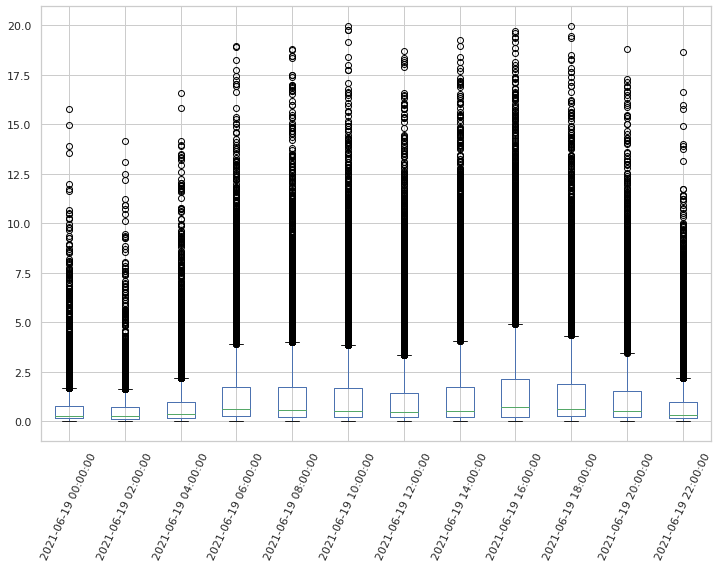

In [17]:
# PATHS

pulse_dir = '../../../profiel-generatie-project/data/'
e1_1_profiles_path = f'{pulse_dir}e1_1_profiles_v2.feather'
sjv_path = f'{pulse_dir}e1_1_sjvs_v2.feather'
generated_samples_path = '../data/generated_samples/'
saved_models_path = '../data/saved_models/'

# PARAMETERS
# the training range that will be extracted from the data
start_dt, end_dt = '2021-06-19 00:00:00', '2021-06-19 23:45:00' 

profile_path = e1_1_profiles_path
sjv_path = sjv_path
cluster = 'E1_VERBRUIK_CLUSTER_1'

# scaled==True: data will be extracted in kW values x -> x * kjv * 4, 
# scaled==False: keep the data normalised
scaled = True

# load the data
e1 = ClusterData(profile_path, sjv_path, start_dt, end_dt, cluster, scaled=scaled)
# drop profiles that have a load value higher then the given parameter
e1.drop_wrong_profiles(20)
e1.plot_cluster_dist(resample_v='2H')
n_profiles = e1.df.shape[1]

### save the real profiles for the preprocessed day, for comparison purposes

In [19]:
experiment='1906_scaled'

X = e1.get_train_format(resample_v='15min').reshape(n_profiles, -1)
log_X = gmm_preprocess(X)

# if real_{experiment} does not exist yet:
np.savetxt(f"{generated_samples_path}real_{experiment}.csv", log_X.reshape(n_profiles,-1), delimiter=",")

# Train GMM

In [20]:
n_components = 10

# train model
gmm_model = gmm_learn(log_X, n_components)
# sample model
sample, labels = gmm_sample(gmm_model, n_profiles)
# save data
np.savetxt(f"{generated_samples_path}/gmm_{experiment}.csv", sample.reshape(n_profiles,-1), delimiter=",")

Initialization 0
  Iteration 10	 time lapse 2.00882s	 ll change 0.20760
  Iteration 20	 time lapse 1.58836s	 ll change 0.03327
  Iteration 30	 time lapse 1.76994s	 ll change 0.01035
  Iteration 40	 time lapse 1.76456s	 ll change 0.00670
  Iteration 50	 time lapse 2.64132s	 ll change 0.00355
  Iteration 60	 time lapse 2.21429s	 ll change 0.00403
  Iteration 70	 time lapse 1.58145s	 ll change 0.00173
Initialization converged: True	 time lapse 15.03328s	 ll -61.01836
